In [1]:
import axelrod as axl
import matplotlib.pyplot as plt
import seaborn
import csv
from sklearn.linear_model import LogisticRegression
import pandas
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
alex, camille = axl.Alternator(), axl.TitForTat()
match = axl.Match([alex, camille], 10)
_ = match.play()
print(match.sparklines(c_symbol='😀', d_symbol='🎁'))

😀🎁😀🎁😀🎁😀🎁😀🎁
😀😀🎁😀🎁😀🎁😀🎁😀


In [3]:
family = [axl.Cooperator(), axl.Defector(), axl.Alternator(), axl.TitForTat(), axl.TwoTitsForTat(), axl.Grudger()]
christmas = axl.Tournament(family, turns=50, repetitions=1)
results = christmas.play()
results.scores

[[525], [562], [417], [622], [646], [646]]

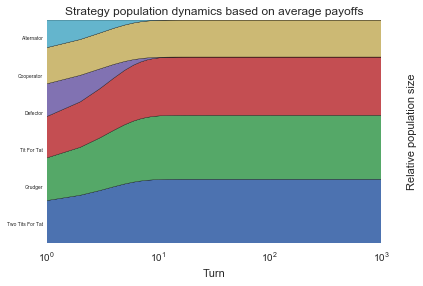

In [4]:
evo = axl.Ecosystem(results)
evo.reproduce(1000)
plot = axl.Plot(results)
p = plot.stackplot(evo);

In [5]:
p.savefig("../images/basic_christmas_evo.svg")

In [6]:
family = [axl.Cooperator(), axl.Defector(), axl.Alternator(), axl.TitForTat(), axl.TwoTitsForTat(), axl.Grudger()]

def check_if_end_pop_cooperates(r=3,p=1,s=0,t=5, digits=5, family=family, turns=10000):
    game = axl.Game(r=r, p=p, s=s, t=t)
    christmas = axl.Tournament(family, turns=50, repetitions=1, game=game)
    results = christmas.play()
    evo = axl.Ecosystem(results)
    evo.reproduce(turns)
    last_pop = [round(pop, digits) for pop in evo.population_sizes[-1]]
    return last_pop[1] == last_pop[2] == 0, last_pop

In [90]:
check_if_end_pop_cooperates(r=3, p=1, s=0, t=5)

(True, [0.16576, 0.0, 0.0, 0.26105, 0.28659, 0.28659])

In [93]:
check_if_end_pop_cooperates(r=3, p=1, s=0, t=50)

(True, [0.0, 0.0, 0.0, 0.06083, 0.46958, 0.46958])

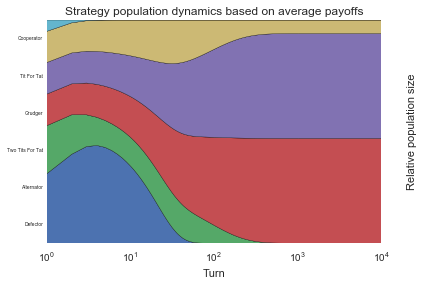

In [95]:
game = axl.Game(r=3, p=1, s=0, t=50)
christmas = axl.Tournament(family, turns=50, repetitions=1, game=game)
results = christmas.play()
evo = axl.Ecosystem(results)
evo.reproduce(10000)
plot = axl.Plot(results)
p = plot.stackplot(evo)
p.savefig("../images/t_factor_of_10_christmas_evo.svg")

In [96]:
check_if_end_pop_cooperates(r=3, p=1, s=0, t=500)

(False, [0.0, 1.0, 0.0, 0.0, 0.0, 0.0])

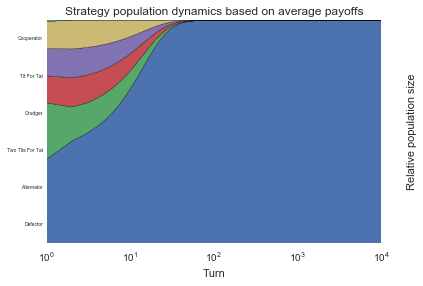

In [97]:
game = axl.Game(r=3, p=1, s=0, t=500)
christmas = axl.Tournament(family, turns=50, repetitions=1, game=game)
results = christmas.play()
evo = axl.Ecosystem(results)
evo.reproduce(10000)
plot = axl.Plot(results)
p = plot.stackplot(evo)
p.savefig("../images/t_factor_of_100_christmas_evo.svg")

# Analyse full data

In [7]:
df = pandas.read_csv("christmas.csv")
df.describe()

,R,P,S,T,Promise,Cooperator,Defector,Alternator,TitForTat,TwoTitsForTat,Grudger
count,50625.000000,50625.000000,50625.000000,50625.000000,50625,50625.000000,50625.000000,50625.000000,50625.000000,50625.000000,50625.000000
mean,26.100000,12.713333,5.932889,52.500000,0.94244,0.096364,0.053926,0.000002,0.236677,0.306516,0.306516
std,21.489136,13.825537,8.419899,29.317926,0.232913,0.088149,0.225872,0.000091,0.076154,0.091554,0.091554
min,3.000000,1.000000,0.000000,5.000000,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.561905,2.866667,0.866667,25.357143,1,0.000900,0.000000,0.000000,0.251920,0.271340,0.271340
50%,19.766667,7.306667,2.590222,52.500000,1,0.082780,0.000000,0.000000,0.261530,0.308530,0.308530
75%,39.085714,17.571429,7.401143,79.642857,1,0.183840,0.000000,0.000000,0.273730,0.356690,0.356690
max,93.533333,87.364444,81.540148,100.000000,True,0.247260,1.000000,0.010520,0.329840,0.494880,0.494880


## Simple frequency analysis

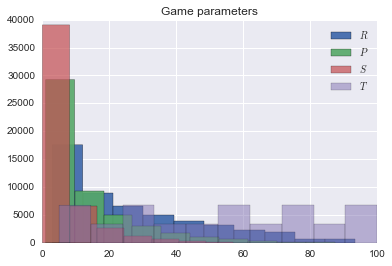

In [8]:
plt.figure()
plt.hist(df["R"], label="$R$")
plt.hist(df["P"], label="$P$", alpha=.9)
plt.hist(df["S"], label="$S$", alpha=.7)
plt.hist(df["T"], label="$T$", alpha=.5)
plt.legend()
plt.title("Game parameters");

In [9]:
df_promise = df[df["Promise"]==True]
df_promise.describe()

,R,P,S,T,Promise,Cooperator,Defector,Alternator,TitForTat,TwoTitsForTat,Grudger
count,47711.000000,47711.000000,47711.000000,47711.000000,47711,47711.000000,47711,47711,47711.000000,47711.000000,47711.000000
mean,27.368176,13.222733,6.171419,51.561455,1,0.102249,0,0,0.250894,0.323429,0.323429
std,21.469488,14.044659,8.595025,29.369334,0,0.087425,0,0,0.051084,0.055910,0.055910
min,3.000000,1.000000,0.000000,5.000000,True,0.000000,0,0,0.011530,0.250920,0.250920
25%,9.466667,3.165079,0.888212,25.357143,1,0.005560,0,0,0.253260,0.275980,0.275980
50%,21.628571,7.920635,2.781312,52.500000,1,0.097020,0,0,0.262940,0.313400,0.313400
75%,40.257143,18.371429,7.829630,79.642857,1,0.188095,0,0,0.274185,0.358460,0.358460
max,93.533333,87.364444,81.540148,100.000000,True,0.247260,0,0,0.329840,0.494230,0.494230


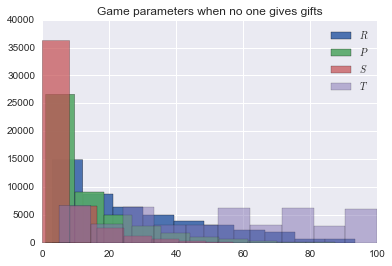

In [10]:
plt.figure()
plt.hist(df_promise["R"], label="$R$")
plt.hist(df_promise["P"], label="$P$", alpha=.9)
plt.hist(df_promise["S"], label="$S$", alpha=.7)
plt.hist(df_promise["T"], label="$T$", alpha=.5)
plt.legend()
plt.title("Game parameters when no one gives gifts")
plt.savefig("../images/parameters_for_which_gifts_are_not_given.svg");

In [11]:
df_broken_promise = df[df["Promise"]==False]
df_broken_promise.describe()

,R,P,S,T,Promise,Cooperator,Defector,Alternator,TitForTat,TwoTitsForTat,Grudger
count,2914.000000,2914.000000,2914.000000,2914.000000,2914,2914,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000
mean,5.336116,4.372924,2.027430,67.866825,0,0,0.936849,0.000038,0.003912,0.029600,0.029600
std,4.258792,4.165689,2.434343,23.659563,0,0,0.243261,0.000376,0.023174,0.114363,0.114363
min,3.000000,1.000000,0.000000,11.785714,False,0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.933333,0.622222,52.500000,0,0,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.600000,1.276000,72.857143,0,0,1.000000,0.000000,0.000000,0.000000,0.000000
75%,6.752381,5.637143,2.253333,86.428571,0,0,1.000000,0.000000,0.000000,0.000000,0.000000
max,28.866667,27.008889,19.575111,100.000000,False,0,1.000000,0.010520,0.300240,0.494880,0.494880


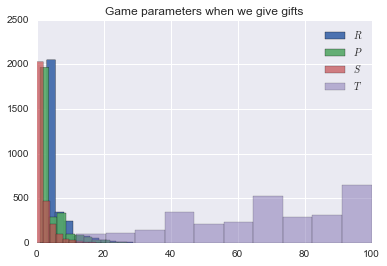

In [12]:
plt.figure()
plt.hist(list(df_broken_promise["R"]), label="$R$")
plt.hist(list(df_broken_promise["P"]), label="$P$", alpha=.9)
plt.hist(list(df_broken_promise["S"]), label="$S$", alpha=.7)
plt.hist(list(df_broken_promise["T"]), label="$T$", alpha=.5)
plt.legend()
plt.title("Game parameters when we give gifts")
plt.savefig("../images/parameters_for_which_gifts_are_given.svg");

In [13]:
X = df[df.columns[:4]]
y = df["Promise"]
model = LogisticRegression()
result = model.fit(X, y)

In [14]:
model.score(X, y)

0.98550123456790129

In [16]:
pandas.DataFrame(list(zip(X.columns, model.coef_[0])), columns=["Variables", "Coefficients"])

,Variables,Coefficients
0,R,3.007720
1,P,-2.830106
2,S,0.010675
3,T,-0.107508


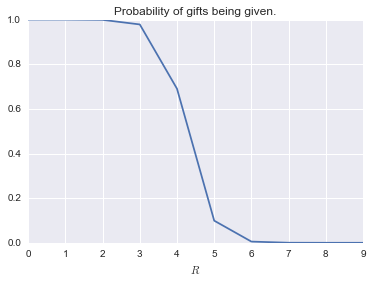

In [17]:
plt.figure()
x = range(10)
y = [model.predict_proba([[r,5,0,1]])[0][0] for r in x]
plt.plot(x,y)
plt.title("Probability of gifts being given.")
plt.xlabel("$R$");

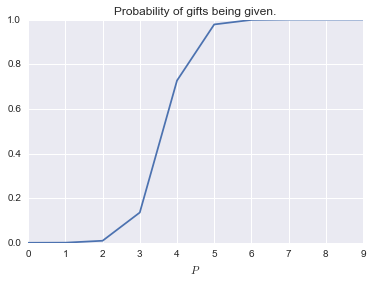

In [18]:
plt.figure()
x = range(10)
y = [model.predict_proba([[3,p,0,1]])[0][0] for p in x]
plt.plot(x,y)
plt.title("Probability of gifts being given.")
plt.xlabel("$P$");

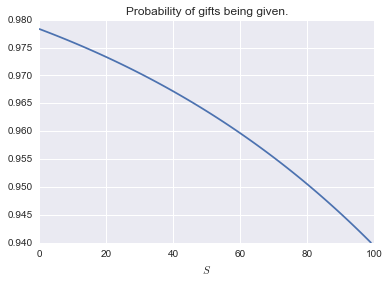

In [19]:
plt.figure()
x = range(100)
y = [model.predict_proba([[3,5,s,1]])[0][0] for s in x]
plt.plot(x,y)
plt.title("Probability of gifts being given.")
plt.xlabel("$S$");

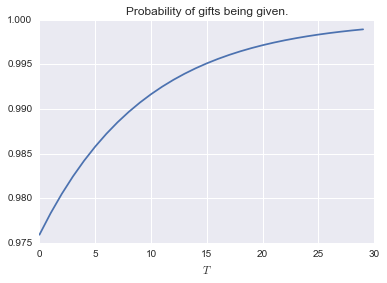

In [20]:
plt.figure()
x = range(30)
y = [model.predict_proba([[3,5,0,t]])[0][0] for t in x]
plt.plot(x,y)
plt.title("Probability of gifts being given.")
plt.xlabel("$T$");